In [8]:
!pip install pydotplus --upgrade

Requirement already up-to-date: pydotplus in c:\users\joeyl\anaconda3\lib\site-packages (2.0.2)


In [19]:
!pip install graphviz

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from graphviz import Digraph

In [2]:
w_df = pd.read_csv('Data for Decision Tree/AMC.csv') #Read the file
w_df.head(30) #Check the data format

,Date,pos,neg,net,abs,Close,Volume,Open,High,Low,ShortVolume,ShortExemptVolume,Short Per,Short up,Shortperch,Short Exempt Per,Nextopen
0,20210128,0.015737,0.016691,-0.000954,0.032427,8.63,591223900,11.98,16.50,6.51,65879740,5762498,0.111429,NaN,NaN,0.009747,14.31
1,20210129,0.014898,0.020615,-0.005717,0.035513,13.26,602193300,14.31,16.00,11.60,147053814,6307292,0.244197,81174074.0,0.132768,0.010474,17.00
2,20210201,0.025263,0.020000,0.005263,0.045263,13.30,434608000,17.00,17.25,12.91,76933491,986909,0.177018,-70120323.0,-0.067179,0.002271,9.48
3,20210202,0.019096,0.029917,-0.010821,0.049013,7.82,462775900,9.48,10.10,6.00,120244517,5744009,0.259833,43311026.0,0.082815,0.012412,8.85
4,20210203,0.020466,0.026763,-0.006297,0.047229,8.97,221405100,8.85,9.77,7.89,61535474,3918022,0.277932,-58709043.0,0.018098,0.017696,8.70
5,20210204,0.018734,0.025316,-0.006582,0.044051,7.09,162985800,8.70,8.74,7.00,44880962,2248578,0.275367,-16654512.0,-0.002564,0.013796,7.17
6,20210205,0.017668,0.026698,-0.009030,0.044366,6.83,195267800,7.17,8.27,6.52,59444755,2116603,0.304427,14563793.0,0.029060,0.010839,6.88
7,20210208,0.017483,0.020979,-0.003497,0.038462,6.18,128171500,6.88,6.89,5.75,39970406,1810126,0.311851,-19474349.0,0.007424,0.014123,5.81
8,20210209,0.025478,0.025478,0.000000,0.050955,5.50,102588100,5.81,5.81,5.26,20727999,1536449,0.202051,-19242407.0,-0.109800,0.014977,5.71
9,20210210,0.000000,0.018519,-0.018519,0.018519,5.80,152810800,5.71,6.59,5.45,24840204,1327153,0.162555,4112205.0,-0.039495,0.008685,5.62


In [3]:
w_df['Nextopen'].unique() 
goal = w_df.iloc[1:29,16] #Independent variable
train = w_df.iloc[1:29,1:16] #Dependent variables
train.isnull().sum() #Checking
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,goal,test_size = 0.1,random_state = 0) #seting up data for train and test

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4) #Creating regressor model
model.fit(x_train,y_train) #Fitting the data

DecisionTreeRegressor(max_depth=4)

In [5]:
print("Training R-Square",model.score(x_train,y_train)) #Print Training accuracy
print("Testing R-Square",model.score(x_test,y_test)) #Print Test accuracy

Training R-Square 0.9905813735858803
Testing R-Square 0.3498051953403988


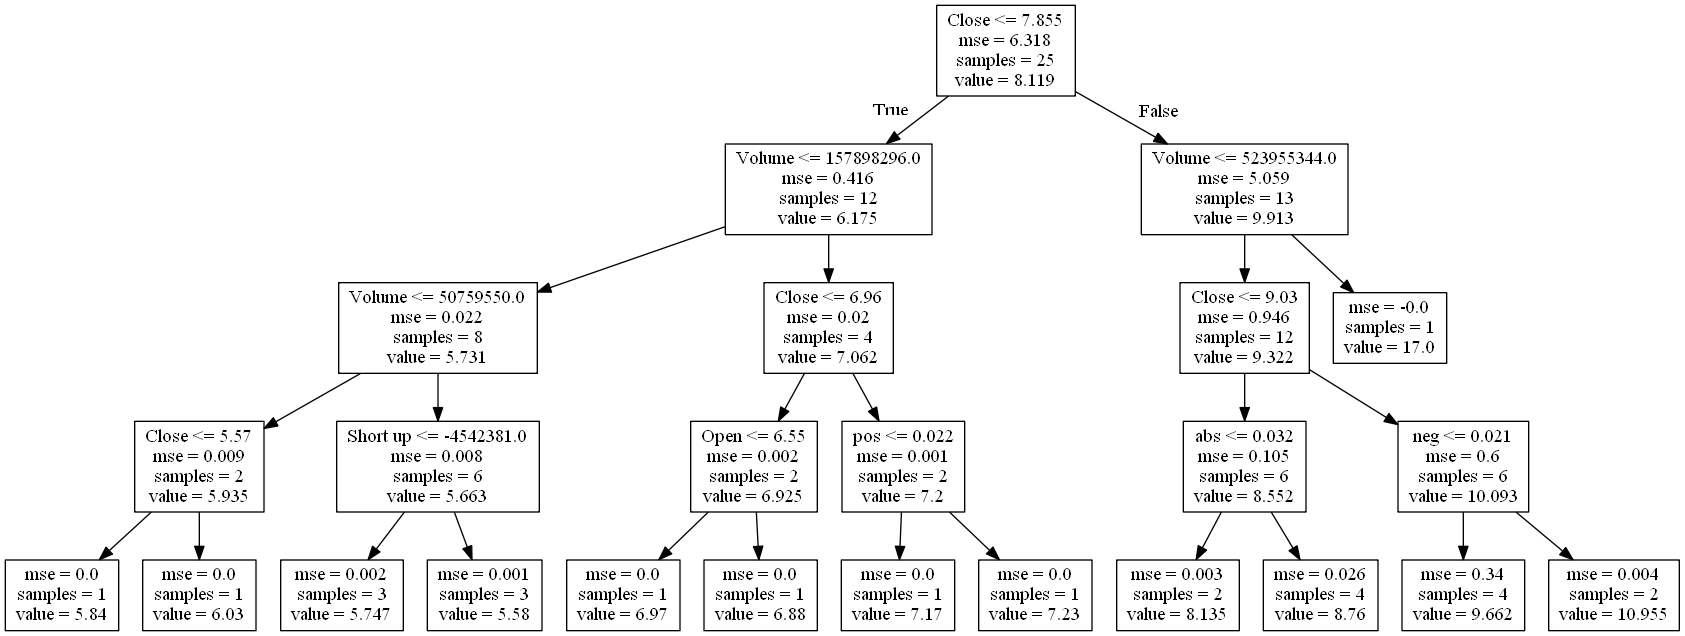

In [6]:
feature_names = list(w_df.columns[1:16]) #Insert column names to the data
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names) #Graph design
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data) #make Graph
Image(graph.create_png()) #print model

In [7]:
test = w_df.iloc[29,1:16] #Row for prediction 
test2 = list(test.to_numpy())
list1 = []
list1.append(test2)
print("Predicted Next day open price: ")
print(model.predict(list1)) #Making the prediction

Predicted Next day open price: 
[10.9550004]


<b>GME</b>

In [8]:
w_df = pd.read_csv('Data for Decision Tree/GME.csv')
w_df.head(30)

,Date,pos,neg,net,abs,Close,Volume,Open,High,Low,Short Volume,Short Exempt Volume,Short Per,Short up,Shortperch,Short Exempt Per,Nextopen
0,01/28/2021,0.017803,0.024046,-0.006243,0.041850,193.600000,58815810,265.000000,483.000000,112.250000,9606123,455032,0.163326,NaN,NaN,0.007737,379.710000
1,01/29/2021,0.017831,0.022018,-0.004187,0.039849,325.000000,50566060,379.710000,413.980000,250.000000,8814229,527920,0.174311,-791894.0,0.010986,0.010440,316.560000
2,02/01/2021,0.018381,0.031072,-0.012691,0.049453,225.000000,37382150,316.560000,322.000000,212.000000,6982444,364890,0.186786,-1831785.0,0.012474,0.009761,140.760000
3,02/02/2021,0.021863,0.026432,-0.004568,0.048295,90.000000,78183070,140.760000,158.000000,74.220100,16358136,1073011,0.209229,9375692.0,0.022443,0.013724,112.010000
4,02/03/2021,0.022329,0.027641,-0.005312,0.049970,92.410000,42698510,112.010000,113.399900,85.250000,9638240,532939,0.225728,-6719896.0,0.016499,0.012481,91.190000
5,02/04/2021,0.019933,0.025149,-0.005216,0.045082,53.500000,62427280,91.190000,91.500000,53.330000,14272780,869183,0.228630,4634540.0,0.002903,0.013923,54.040000
6,02/05/2021,0.018808,0.025150,-0.006342,0.043958,63.770000,81345010,54.040000,95.000000,51.090000,19063724,1106467,0.234356,4790944.0,0.005726,0.013602,72.410000
7,02/08/2021,0.028446,0.031729,-0.003282,0.060175,60.000000,25687280,72.410000,72.660000,58.020000,6404809,82425,0.249338,-12658915.0,0.014981,0.003209,56.610000
8,02/09/2021,0.018223,0.011390,0.006834,0.029613,50.310000,26843080,56.610000,57.000000,46.520000,6516142,277522,0.242749,111333.0,-0.006588,0.010339,50.770000
9,02/10/2021,0.021526,0.039139,-0.017613,0.060665,51.200000,36455040,50.770000,62.830000,46.550000,6587323,241069,0.180697,71181.0,-0.062052,0.006613,50.010000


Training R-Square 0.9964760683879297
Testing R-Square 0.9366229210649315


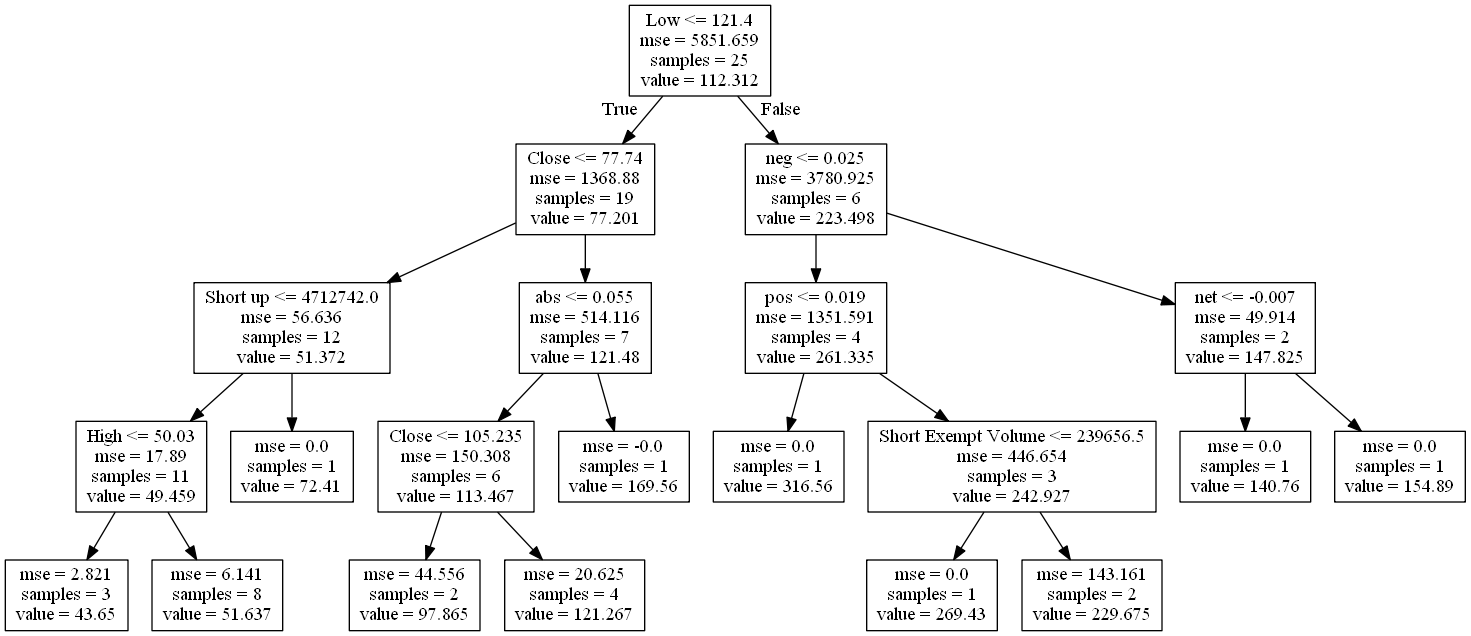

In [9]:
w_df['Nextopen'].unique()
goal = w_df.iloc[1:29,16]
train = w_df.iloc[1:29,1:16]
train.isnull().sum()
x_train,x_test,y_train,y_test = train_test_split(train,goal,test_size = 0.1,random_state = 0)
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
feature_names = list(w_df.columns[1:16])
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
test = w_df.iloc[29,1:16]
test2 = list(test.to_numpy())
list1 = []
list1.append(test2)
print("Predicted Next day open price: ")
print(model.predict(list1))

Predicted Next day open price: 
[229.675003]


<b>NOK</b>

In [11]:
w_df = pd.read_csv('Data for Decision Tree/NOK.csv')
w_df.head(30)

,Date,pos,neg,net,abs,Close,Volume,Open,High,Low,Short Volume,Short Exempt Volume,Short Per,Short up,Shortperch,Short Exempt Per,Nextopen
0,01/28/2021,0.013754,0.020227,-0.006472,0.033981,4.69,675220900,5.18,5.53,4.59,80506264,3185900,0.119230,NaN,NaN,0.004718,5.13
1,01/29/2021,0.015814,0.019112,-0.003298,0.034926,4.56,360766100,5.13,5.22,4.53,53711194,1350518,0.148881,-26795070.0,0.029651,0.003743,4.97
2,02/01/2021,0.017361,0.031250,-0.013889,0.048611,4.89,194969200,4.97,4.99,4.66,26527342,48681,0.136059,-27183852.0,-0.012822,0.000250,4.74
3,02/02/2021,0.035433,0.019685,0.015748,0.055118,4.53,165679700,4.74,4.76,4.40,22291391,1416300,0.134545,-4235951.0,-0.001514,0.008548,4.63
4,02/03/2021,0.008499,0.042493,-0.033994,0.050992,4.70,95964300,4.63,4.76,4.52,13726580,883627,0.143038,-8564811.0,0.008493,0.009208,4.49
5,02/04/2021,0.021407,0.018349,0.003058,0.039755,4.37,151036400,4.49,4.56,4.30,23552142,224721,0.155937,9825562.0,0.012898,0.001488,4.33
6,02/05/2021,0.023256,0.031008,-0.007752,0.054264,4.22,107158500,4.33,4.33,4.20,12311621,120712,0.114892,-11240521.0,-0.041045,0.001126,4.28
7,02/08/2021,0.000000,0.000000,0.000000,0.000000,4.26,79270400,4.28,4.35,4.21,10332575,46026,0.130346,-1979046.0,0.015454,0.000581,4.26
8,02/09/2021,0.000000,0.000000,0.000000,0.000000,4.19,83593900,4.26,4.27,4.17,8850988,104145,0.105881,-1481587.0,-0.024465,0.001246,4.21
9,02/10/2021,0.000000,0.000000,0.000000,0.000000,4.17,79240200,4.21,4.22,4.10,8681313,76813,0.109557,-169675.0,0.003676,0.000969,4.16


Training R-Square 0.9853303729164907
Testing R-Square 0.8601358234295409


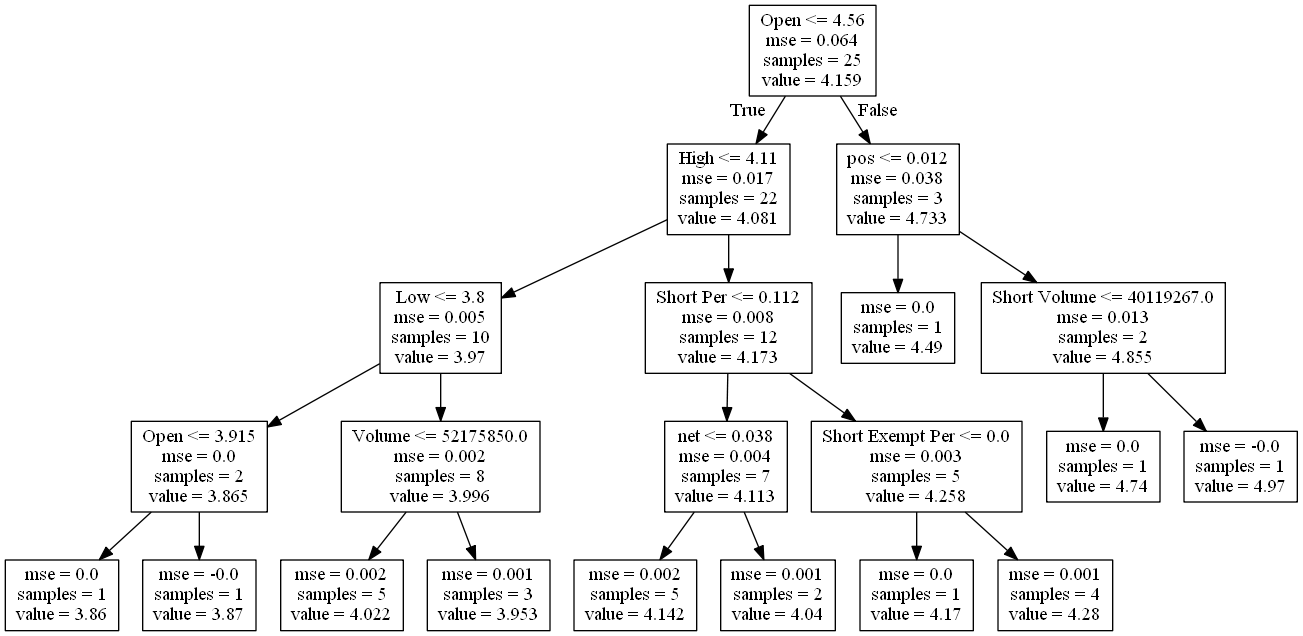

In [12]:
w_df['Nextopen'].unique()
goal = w_df.iloc[1:29,16]
train = w_df.iloc[1:29,1:16]
train.isnull().sum()
x_train,x_test,y_train,y_test = train_test_split(train,goal,test_size = 0.1,random_state = 0)
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
feature_names = list(w_df.columns[1:16])
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
test = w_df.iloc[29,1:16]
test2 = list(test.to_numpy())
list1 = []
list1.append(test2)
print("Predicted Next day open price: ")
print(model.predict(list1))

Predicted Next day open price: 
[4.17]


<b>PLTR</b>

In [14]:
w_df = pd.read_csv('Data for Decision Tree/PLTR.csv')
w_df.head(30)

,Date,pos,neg,net,abs,Close,Volume,Open,High,Low,Short Volume,Short Exempt Volume,Short Per,Short up,Shortperch,Short Exempt Per,Nextopen
0,01/28/2021,0.027523,0.018349,0.009174,0.045872,35.660000,85250700,39.540001,42.000000,33.099998,23130317,809070,0.271321,NaN,NaN,0.009490,36.610001
1,01/29/2021,0.005865,0.032258,-0.026393,0.038123,35.180000,42030900,36.610001,38.009998,34.660000,10293959,630121,0.244914,-12836358.0,-0.026407,0.014992,35.330002
2,02/01/2021,0.000000,0.000000,0.000000,0.000000,33.959999,43460900,35.330002,35.619999,32.580002,11840636,95715,0.272443,1546677.0,0.027529,0.002202,34.099998
3,02/02/2021,0.000000,0.000000,0.000000,0.000000,31.020000,69647900,34.099998,34.200001,30.500000,19231252,492216,0.276121,7390616.0,0.003678,0.007067,32.389999
4,02/03/2021,0.017241,0.008621,0.008621,0.025862,31.760000,35312000,32.389999,32.950001,31.379999,9381871,374761,0.265685,-9849381.0,-0.010436,0.010613,32.580002
5,02/04/2021,0.019608,0.000000,0.019608,0.019608,32.049999,31565000,32.580002,33.180000,31.049999,9150435,141065,0.289892,-231436.0,0.024207,0.004469,32.610001
6,02/05/2021,0.018182,0.000000,0.018182,0.018182,34.049999,62230800,32.610001,35.200001,31.750000,14667298,208177,0.235692,5516863.0,-0.054200,0.003345,37.220001
7,02/08/2021,0.000000,0.000000,0.000000,0.000000,36.049999,72376000,37.220001,39.220001,35.889999,11841954,115360,0.163617,-2825344.0,-0.072075,0.001594,36.900002
8,02/09/2021,0.000000,0.000000,0.000000,0.000000,38.169998,44243200,36.900002,38.255001,36.130001,7292643,90561,0.164831,-4549311.0,0.001214,0.002047,38.150002
9,02/10/2021,0.000000,0.111111,-0.111111,0.111111,35.700001,45177200,38.150002,38.240002,35.000000,7049015,111688,0.156030,-243628.0,-0.008800,0.002472,35.790001


Training R-Square 0.9991976227259752
Testing R-Square 0.4861563592174557


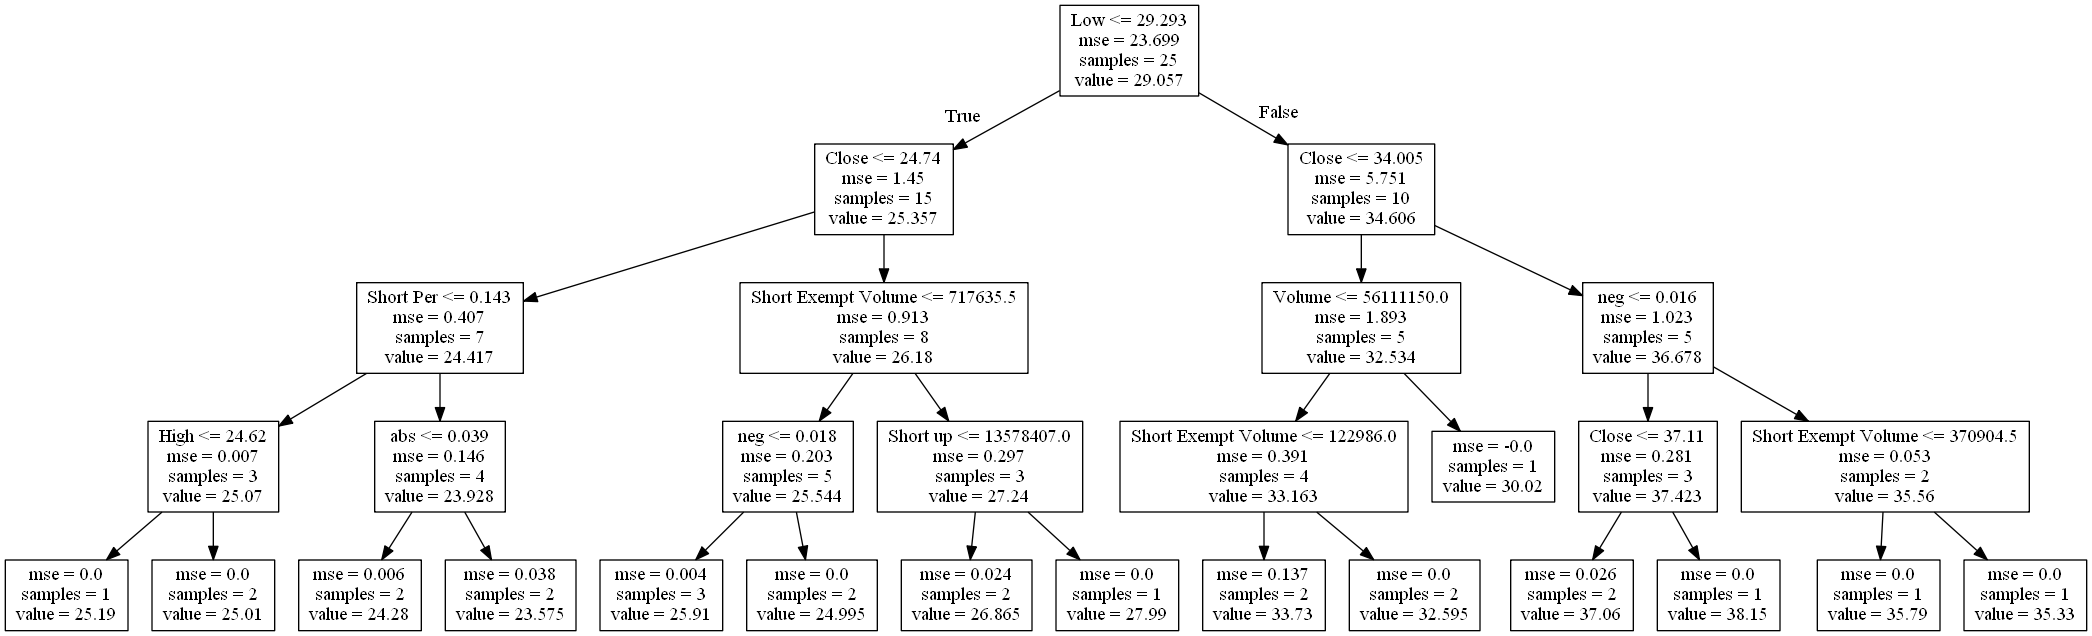

In [15]:
w_df['Nextopen'].unique()
goal = w_df.iloc[1:29,16]
train = w_df.iloc[1:29,1:16]
train.isnull().sum()
x_train,x_test,y_train,y_test = train_test_split(train,goal,test_size = 0.1,random_state = 0)
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
feature_names = list(w_df.columns[1:16])
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [16]:
test = w_df.iloc[29,1:16]
test2 = list(test.to_numpy())
list1 = []
list1.append(test2)
print("Predicted Next day open price: ")
print(model.predict(list1))

Predicted Next day open price: 
[24.995]


<b>TSLA</b>

In [17]:
w_df = pd.read_csv('Data for Decision Tree/TSLA.csv')
w_df.head(30)

,Date,pos,neg,net,abs,ShortVolume,ShortExemptVolume,Open,High,Low,Close,Volume,Short Per,Short up,Shortperch,Short Exempt Per,Nextopen
0,20210128,0.012500,0.018750,-0.006250,0.031250,5613434,49138,820.00,848.00,801.00,835.43,26378000,0.212807,NaN,NaN,0.001863,830.00
1,20210129,0.016489,0.024248,-0.007759,0.040737,7821075,61470,830.00,842.41,780.10,793.53,34990800,0.223518,2207641.0,0.010711,0.001757,814.29
2,20210201,0.037313,0.037313,0.000000,0.074627,4278149,100866,814.29,842.00,795.56,839.81,25391400,0.168488,-3542926.0,-0.055030,0.003972,844.68
3,20210202,0.013699,0.013699,0.000000,0.027397,3998789,46157,844.68,880.50,842.20,872.79,24346200,0.164247,-279360.0,-0.004241,0.001896,877.02
4,20210203,0.036082,0.036082,0.000000,0.072165,2816174,24431,877.02,878.08,853.06,854.69,18343500,0.153524,-1182615.0,-0.010723,0.001332,855.00
5,20210204,0.036145,0.000000,0.036145,0.036145,2500055,21214,855.00,856.50,833.42,849.99,15812700,0.158104,-316119.0,0.004580,0.001342,845.00
6,20210205,0.026393,0.023460,0.002933,0.049853,2931669,44287,845.00,864.77,838.97,852.23,18566600,0.157900,431614.0,-0.000204,0.002385,869.67
7,20210208,0.000000,0.000000,0.000000,0.000000,3066176,29689,869.67,877.77,854.75,863.42,20161700,0.152079,134507.0,-0.005821,0.001473,855.12
8,20210209,0.000000,0.000000,0.000000,0.000000,2392436,16322,855.12,859.80,841.75,849.46,15157700,0.157836,-673740.0,0.005757,0.001077,843.64
9,20210210,0.074074,0.037037,0.037037,0.111111,5762370,48522,843.64,844.82,800.02,804.82,36216100,0.159111,3369934.0,0.001274,0.001340,812.44


Training R-Square 0.9992507327575526
Testing R-Square 0.7067499615419481


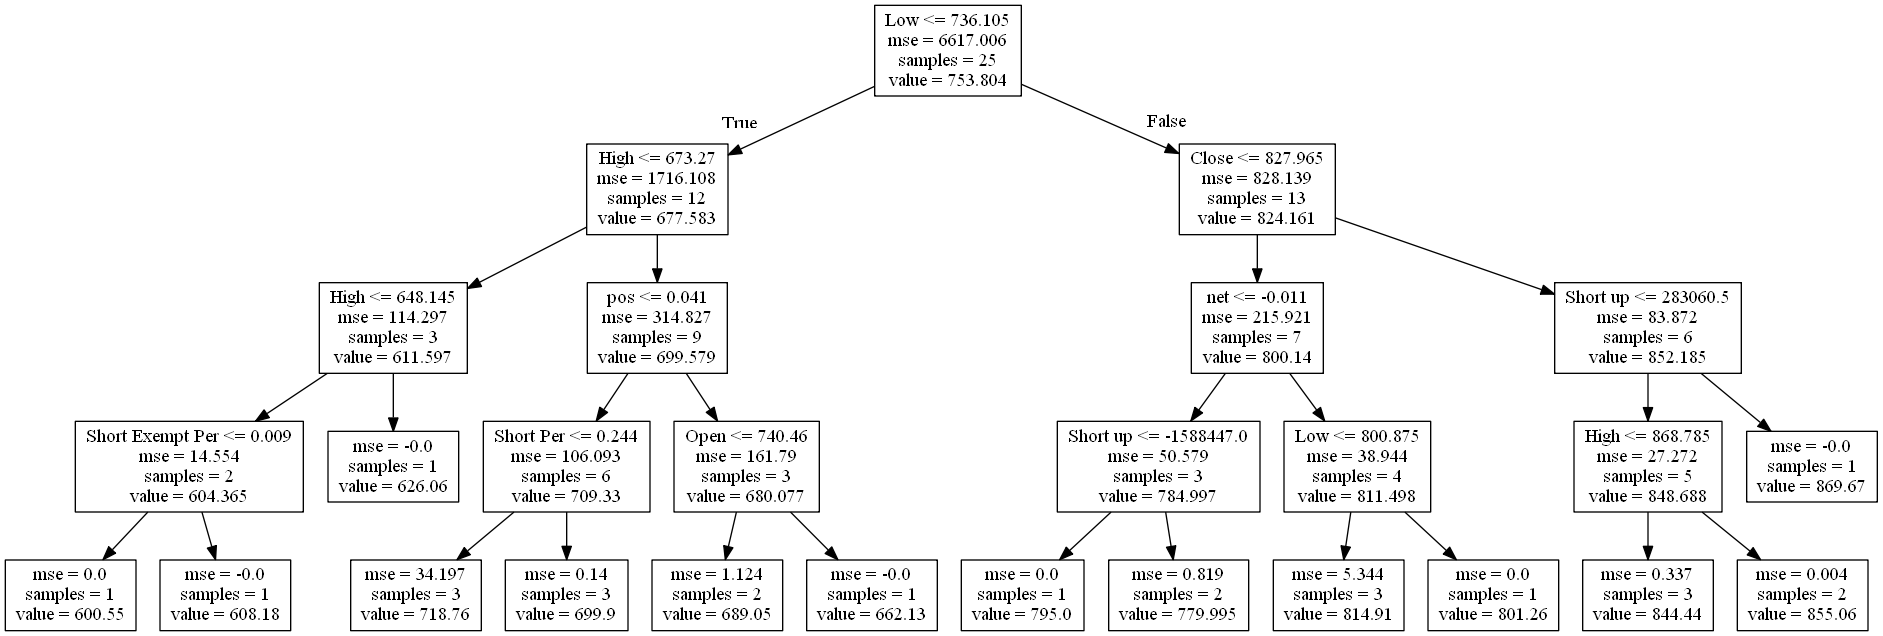

In [18]:
w_df['Nextopen'].unique()
goal = w_df.iloc[1:29,16]
train = w_df.iloc[1:29,1:16]
train.isnull().sum()
x_train,x_test,y_train,y_test = train_test_split(train,goal,test_size = 0.1,random_state = 0)
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(x_train,y_train)
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))
feature_names = list(w_df.columns[1:16])
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [19]:
test = w_df.iloc[29,1:16]
test2 = list(test.to_numpy())
list1 = []
list1.append(test2)
print("Predicted Next day open price: ")
print(model.predict(list1))

Predicted Next day open price: 
[699.9]
